# Electrical Failure Data

Prashant Brahmbhatt

_______

Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')

Importing the dataset

In [4]:
data = pd.read_csv('electric_data.csv')
data.head()

,date_of_trip,time_of_trip,weather,other_circuit,line_trip,load_of_line,voltage,frequency,other_line_status,date of restoration,time_of_restoration,observation,repair_carried,tripping_reason
0,08-11-2017,05:39,cloudy,healthy,yes,71,237,49.87,NaN,08-11-2017,07:50,NaN,nil,bad weather
1,10-05-2017,15:56,cloudy,healthy,yes,187,220,49.98,NaN,10-05-2017,16:34,NaN,nil,transient fault
2,11-10-2017,12:35,clear,healthy,yes,124,229,49.94,NaN,11-10-2017,13:45,NaN,nil,foreign element
3,18-06-2017,05:37,clear,healthy,yes,105,228,50.01,NaN,18-06-2017,06:17,NaN,nil,foreign element
4,19-06-2017,06:30,rainy,healthy,yes,102,229,50.05,NaN,19-06-2017,07:18,disc puncture,feeder isolated,transient fault


In [5]:
data.describe()

,load_of_line,voltage,frequency,other_line_status
count,38.000000,38.000000,38.000000,0.0
mean,123.236842,231.000000,49.852632,NaN
std,46.066599,7.162213,0.991395,NaN
min,50.000000,218.000000,43.920000,NaN
25%,99.750000,225.250000,49.980000,NaN
50%,122.000000,230.000000,50.030000,NaN
75%,154.500000,236.000000,50.057500,NaN
max,230.000000,244.000000,50.160000,NaN


## Handling Missing Values

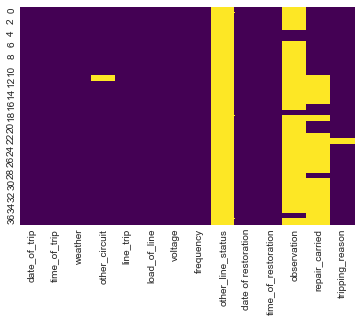

In [6]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

Observations:  
the columns **other_line_status** and **observation** are almost all missing so we can drop those.  
We will observe the significant missing values in column **repairs** before dropping.

There is a slight missing terms in the **tripping_reason** column.  
So we can fill it with the most frequent value

In [7]:
data['tripping_reason'].value_counts()

transient fault    11
bad weather        10
foreign element     4
fuse failure        3
earth fault         2
relay burn          2
breaker opened      2
trip from kite      2
wire fallen         1
Name: tripping_reason, dtype: int64

filling the missing value as ***transient_fault***

In [8]:
data['tripping_reason'].fillna(value = 'transient fault', inplace = True)

Another column having missing values is **other_circuit**

In [9]:
data['other_circuit'].value_counts()

healthy    37
Name: other_circuit, dtype: int64

Since we observe that the column contain only single and almost definitely occuring type of value so it is not suggestable to include this column having very less entropy, in the model

In [10]:
data.drop('other_line_status', inplace = True, axis  =1)
data.drop('observation', inplace = True, axis  =1)
data.drop('other_circuit', inplace = True, axis  =1)

Observing the missing values in **repairs_carried** column

In [11]:
data['repair_carried'].value_counts()

nil                    8
phase disc replaced    3
leakage attended       2
fuse                   2
relay removed          1
feeder isolated        1
Name: repair_carried, dtype: int64

filling it with most frequent value

In [12]:
data['repair_carried'].fillna(value = 'nil', inplace= True)

## EDA

Separating the **years**, **months** and **hours** from the date and time

In [13]:
#Separating year
data['trip_year'] = data['date_of_trip'].apply(lambda x: x.split('-')[2])
data['restore_year'] = data['date of restoration'].apply(lambda x: x.split('-')[2])

#Separating month
data['trip_month'] = data['date_of_trip'].apply(lambda x: x.split('-')[1])
data['restore_month'] = data['date of restoration'].apply(lambda x: x.split('-')[1])


#separating hours
data['trip_hour'] = data['time_of_trip'].apply(lambda x: x.split(':')[0])
data['restore_hour'] = data['time_of_restoration'].apply(lambda x: x.split(':')[0])

In [14]:
#dropping the columns
#data.drop(labels = ['date_of_trip','date of restoration','time_of_trip','time_of_restoration'], inplace = True, axis = 1)

In [15]:
data.head()

,date_of_trip,time_of_trip,weather,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,yes,71,237,49.87,08-11-2017,07:50,nil,bad weather,2017,2017,11,11,05,07
1,10-05-2017,15:56,cloudy,yes,187,220,49.98,10-05-2017,16:34,nil,transient fault,2017,2017,05,05,15,16
2,11-10-2017,12:35,clear,yes,124,229,49.94,11-10-2017,13:45,nil,foreign element,2017,2017,10,10,12,13
3,18-06-2017,05:37,clear,yes,105,228,50.01,18-06-2017,06:17,nil,foreign element,2017,2017,06,06,05,06
4,19-06-2017,06:30,rainy,yes,102,229,50.05,19-06-2017,07:18,feeder isolated,transient fault,2017,2017,06,06,06,07


Converting the datatype from object to integers

In [16]:
#Convertig datatypes to integer
data['trip_month'] = data['trip_month'].astype(int)
data['trip_hour'] = data['trip_hour'].astype(int)
data['trip_year'] = data['trip_year'].astype(int)
data['restore_hour'] = data['restore_hour'].astype(int)
data['restore_year'] = data['restore_year'].astype(int)
data['restore_month'] = data['restore_month'].astype(int)

In [17]:
data.head()

,date_of_trip,time_of_trip,weather,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,yes,71,237,49.87,08-11-2017,07:50,nil,bad weather,2017,2017,11,11,5,7
1,10-05-2017,15:56,cloudy,yes,187,220,49.98,10-05-2017,16:34,nil,transient fault,2017,2017,5,5,15,16
2,11-10-2017,12:35,clear,yes,124,229,49.94,11-10-2017,13:45,nil,foreign element,2017,2017,10,10,12,13
3,18-06-2017,05:37,clear,yes,105,228,50.01,18-06-2017,06:17,nil,foreign element,2017,2017,6,6,5,6
4,19-06-2017,06:30,rainy,yes,102,229,50.05,19-06-2017,07:18,feeder isolated,transient fault,2017,2017,6,6,6,7


Mapping the integer **month** values to names

In [18]:
#Mapping the months
data['trip_month'] = data['trip_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

data['restore_month'] = data['trip_month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                               8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})


In [19]:
data.head()

,date_of_trip,time_of_trip,weather,line_trip,load_of_line,voltage,frequency,date of restoration,time_of_restoration,repair_carried,tripping_reason,trip_year,restore_year,trip_month,restore_month,trip_hour,restore_hour
0,08-11-2017,05:39,cloudy,yes,71,237,49.87,08-11-2017,07:50,nil,bad weather,2017,2017,November,NaN,5,7
1,10-05-2017,15:56,cloudy,yes,187,220,49.98,10-05-2017,16:34,nil,transient fault,2017,2017,May,NaN,15,16
2,11-10-2017,12:35,clear,yes,124,229,49.94,11-10-2017,13:45,nil,foreign element,2017,2017,October,NaN,12,13
3,18-06-2017,05:37,clear,yes,105,228,50.01,18-06-2017,06:17,nil,foreign element,2017,2017,June,NaN,5,6
4,19-06-2017,06:30,rainy,yes,102,229,50.05,19-06-2017,07:18,feeder isolated,transient fault,2017,2017,June,NaN,6,7


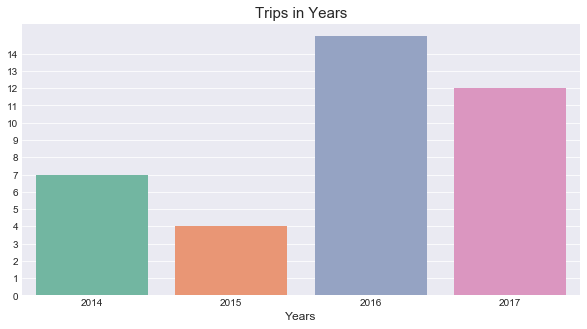

In [20]:
temp = data['trip_year'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips in Years',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'Set2')
plt.xlabel('Years', fontsize = 12)
plt.yticks(list(range(max(temp))))
plt.show()

Observation: (**Barplot**)    
We can see that year **2016** has most faults above all while 2015 has the least.

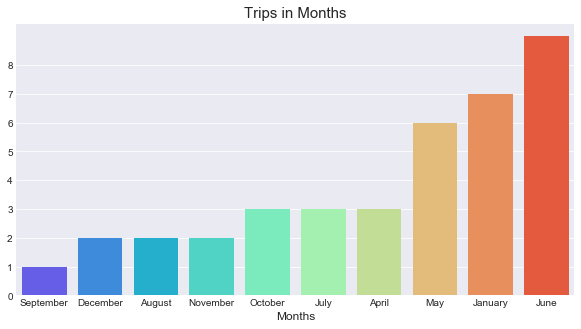

In [21]:
temp = data['trip_month'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips in Months',fontsize = 15)
sns.barplot(x = temp.index[::-1], y = temp.values[::-1], palette = 'rainbow')
plt.xlabel('Months', fontsize = 12)
plt.yticks(list(range(max(temp))))
plt.show()

Observation: (**Barplot**)  
From the above plot we can observe that most number of faults are during Summer season and tens to happen less during the winter months.

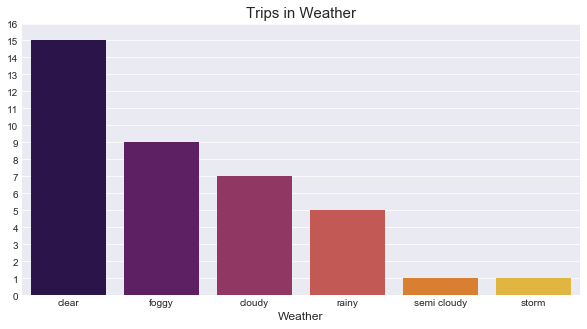

In [28]:
temp = data['weather'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips in Weather',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'inferno')
plt.xlabel('Weather', fontsize = 12)
plt.yticks(list(range(0,max(temp)+2)))
plt.show()

Observation: (**Barplot**)  
The faults are mostly during Clear skies.

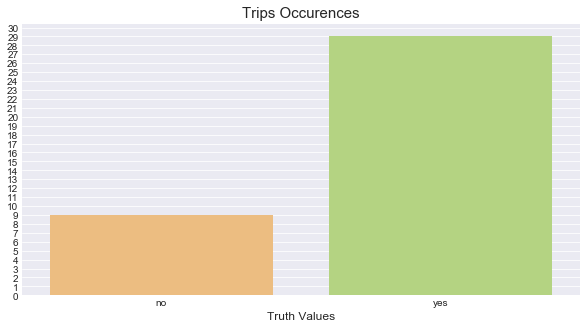

In [23]:
temp = data['line_trip'].value_counts()
plt.figure(figsize= (10,5))
plt.title('Trips Occurences',fontsize = 15)
sns.barplot(x = temp.index[::-1], y = temp.values[::-1], palette = 'RdYlGn')
plt.xlabel('Truth Values', fontsize = 12)
plt.yticks(list(range(0,max(temp)+2)))
plt.show()

Observation: (**Barplot**)  
Trips in the faults has been more than thrice than no trips.

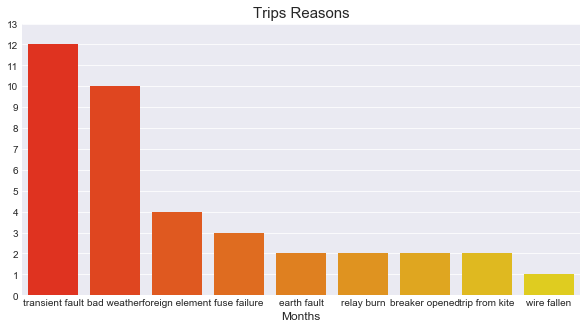

In [30]:
temp = data['tripping_reason'].value_counts()

plt.figure(figsize= (10,5))
plt.title('Trips Reasons',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'autumn')
plt.xlabel('Months', fontsize = 12)
plt.yticks(range(max(temp)+2))
plt.show()

Observation: (**Barplot**)  
Among the faults reasons that most account of faults is due to **transient_fault** or **bad_weather**

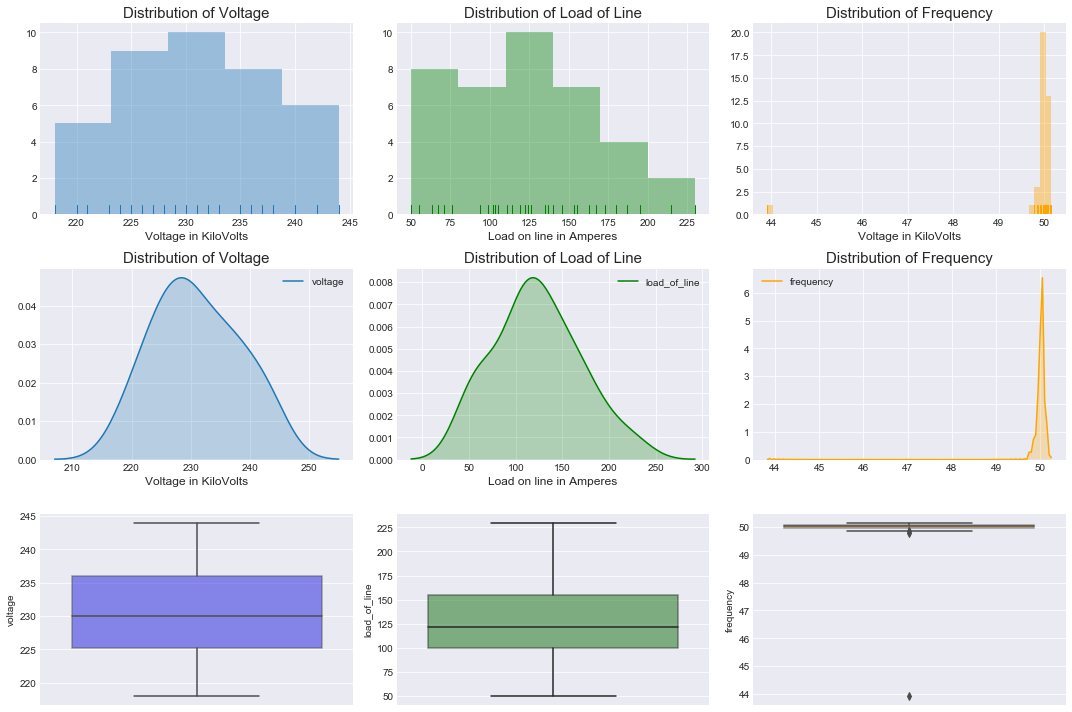

In [31]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(data['voltage'], rug = True, kde = False)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(data['load_of_line'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)

plt.subplot(3,3,3)
sns.distplot(data['frequency'], rug= True, color= 'orange', kde = False)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Frequency',fontsize = 15)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(data['voltage'], shade = True)
plt.xlabel('Voltage in KiloVolts', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(data['load_of_line'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)

plt.subplot(3,3,6)
sns.kdeplot(data['frequency'],shade= True, color = 'Orange')
plt.title('Distribution of Frequency',fontsize = 15)

#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = data['voltage'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = data['load_of_line'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))
plt.subplot(3,3,9)
sns.boxplot(x = data['frequency'], orient = 'v', color= 'Orange', boxprops=dict(alpha=.5))

plt.tight_layout()
plt.show()

Observation: (**Histogram, Kernel Plot and Box Plot**)  
 
We can see that **Voltage** and **Current** have considerable spread however there is very little spread in the **frequency** parameter.  
Since it is not entirely fixed rather than dropping it we can scale it for the model.  
There is not a sufficient amount of data to have some outliers either.

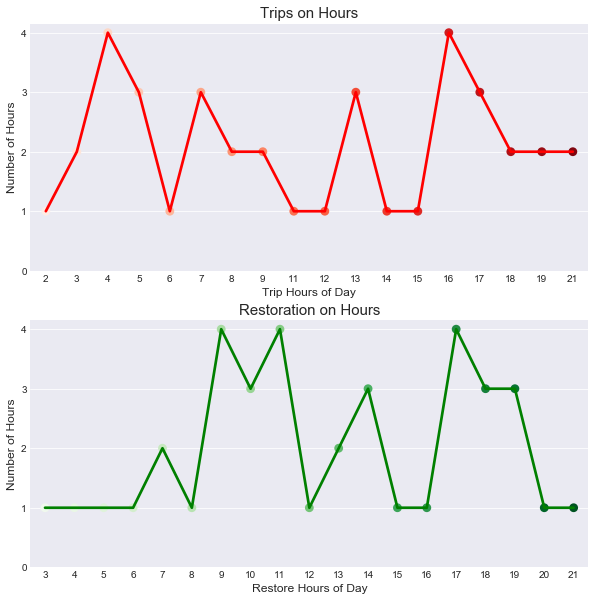

In [26]:
temp = data['trip_hour'].value_counts()
plt.figure(figsize= (10,10))

plt.subplot(2,1,1)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Reds')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color = 'r',markers = '')
plt.title('Trips on Hours',fontsize = 15)
plt.xlabel('Trip Hours of Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])

temp = data['restore_hour'].value_counts()
plt.subplot(2,1,2)
sns.pointplot(x = temp.index, y = temp.values ,palette= 'Greens')
sns.pointplot(x = temp.index, y = temp.values ,join= True, color='g', markers = '')
plt.title('Restoration on Hours',fontsize = 15)
plt.xlabel('Restore Hours of Day', fontsize = 12)
plt.ylabel('Number of Hours', fontsize = 12)
plt.yticks([0,1,2,3,4])
plt.show()

Observation: (**Line Plot**)  
We can observe that the most fault peaks (plot 1 in red), has highest peaks during the very early morning and during dusk.  
There is not sufficient regular pattern so it may or may not be a considerable parameter.

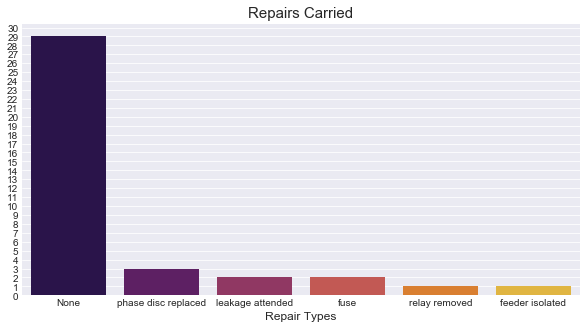

In [27]:
for i in range(0,len(data['repair_carried'])):
    if data['repair_carried'][i] == 'nil':
        data['repair_carried'][i] = 'None'
temp = data['repair_carried'].value_counts()
plt.figure(figsize= (10,5))
plt.title('Repairs Carried',fontsize = 15)
sns.barplot(x = temp.index, y = temp.values, palette = 'inferno')
plt.xlabel('Repair Types', fontsize = 12)
plt.yticks(range(max(temp)+2))
plt.show()

Mostly there were no repairs were done or maybe not recorded and if there are no faults then the repairs would be **None** for them too. So we can rule this out as a prarmeter